<a href="https://www.kaggle.com/code/sutariyasmit01/kmeans-cust-segmentation?scriptVersionId=247350502" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [12]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X=df[["Annual Income (k$)","Spending Score (1-100)"]]

In [6]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [4]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [10]:
from sklearn.cluster import KMeans

In [13]:
wcss=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    Kmeans.fit(x_scaled)
    wcss.append(Kmeans.inertia_)


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

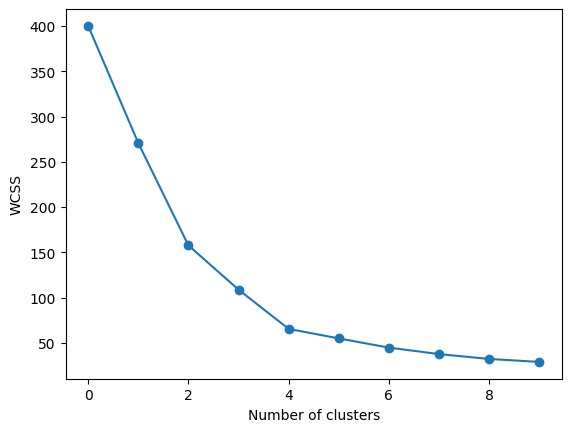

In [17]:
plt.plot(range(len(wcss)),wcss,marker='o')
plt.title=("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [18]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)

In [20]:
y_kmeans=kmeans.fit_predict(x_scaled)

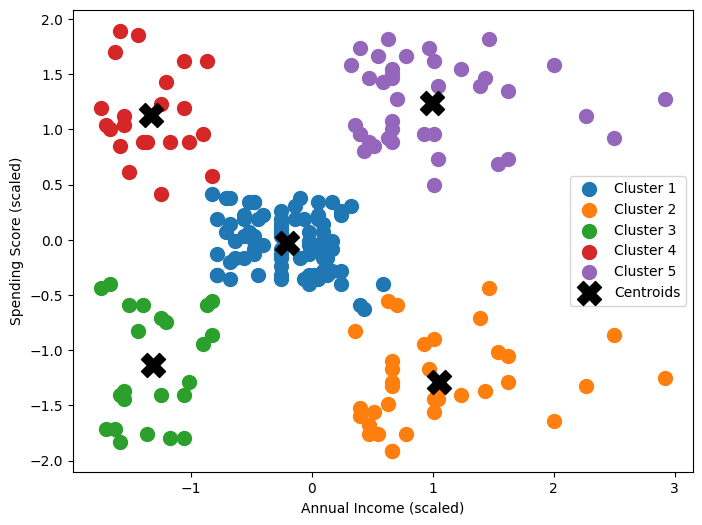

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(x_scaled[y_kmeans == 0, 0], x_scaled[y_kmeans == 0, 1], s=100, label='Cluster 1')
plt.scatter(x_scaled[y_kmeans == 1, 0], x_scaled[y_kmeans == 1, 1], s=100, label='Cluster 2')
plt.scatter(x_scaled[y_kmeans == 2, 0], x_scaled[y_kmeans == 2, 1], s=100, label='Cluster 3')
plt.scatter(x_scaled[y_kmeans == 3, 0], x_scaled[y_kmeans == 3, 1], s=100, label='Cluster 4')
plt.scatter(x_scaled[y_kmeans == 4, 0], x_scaled[y_kmeans == 4, 1], s=100, label='Cluster 5')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='black', label='Centroids', marker='X')


plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend()
plt.show()


In [25]:
df['Label'] = y_kmeans
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
